# Loading library

In [111]:
# Import of libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
import networkx as nx
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report

%matplotlib inline

# Loading Data

In [2]:
# Set epsilon parameter
epsilon=0.00001

# Extract table
pd_content = pd.read_csv('data/matrix_reci_delete.csv') 
pd_content['follower_researcher_male_female_ratio'] = pd_content['follower_researcher_female']/(pd_content['follower_researcher_male']+pd_content['follower_researcher_female']+epsilon)
pd_content['follower_researcher_phd_prof_ratio'] = pd_content['follower_researcher_prof']/(pd_content['follower_researcher_phd']+pd_content['follower_researcher_prof']+epsilon)
pd_content['follower_reciprocal_researcher_male_female_ratio'] = pd_content['follower_reciprocal_researcher_female']/(pd_content['follower_reciprocal_researcher_male']+pd_content['follower_reciprocal_researcher_female']+epsilon)
pd_content['follower_reciprocal_researcher_phd_prof_ratio'] = pd_content['follower_reciprocal_researcher_prof']/(pd_content['follower_reciprocal_researcher_phd']+pd_content['follower_reciprocal_researcher_prof']+epsilon)
extract_list=pd.read_table('data/feature_we_want.txt') 
pd_extract=pd_content[extract_list['feature']]
pd_extract=pd_extract.fillna(0)
pd_extract=pd_extract.replace('NA   ',0)
pd_extract=pd_extract.replace('NA    ',0)
pd_extract=pd_extract.replace('NA ',0)
pd_extract=pd_extract.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
pd_extract_scaled = pd.DataFrame(min_max_scaler.fit_transform(pd_extract.values),columns=pd_extract.columns)

In [21]:
pd_content

,id,gender,role,language_english,duration_in_days,publications,organic_tweets,follower_global,followees_global,follower_researcher,...,fraction_of_tweets_with_url,nof_conf_hashtags,nof_distinct_hashtags,nof_overall_hashtags,fraction_of_distinct_hashtags,nof_conf_mentions,follower_researcher_male_female_ratio,follower_researcher_phd_prof_ratio,follower_reciprocal_researcher_male_female_ratio,follower_reciprocal_researcher_phd_prof_ratio
0,633,NA,NA,1,2728,24,277,92876,1056,844,...,0.2118,106,221,363,0.6088,8.0,0.283422,0.393574,0.333333,0.750000
1,722,female,phd,1,2728,5,258,18523,754,64,...,0.106,47,122,181,0.674,3.0,0.184210,0.461538,0.192308,0.555555
2,2179,male,professor,1,2723,13,243,1897,155,5,...,0.2859,408,541,1165,0.4644,6.0,0.799998,0.499998,0.999995,0.999990
3,2360,NA,NA,1,2723,8,37,316,169,5,...,0.6055,55,93,149,0.6242,2.0,0.200000,0.000000,0.499998,0.000000
4,2493,female,professor,1,2722,12,535,626,855,59,...,0.2743,73,243,379,0.6412,7.0,0.475000,0.533333,0.454545,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8600,2291332501,NA,NA,1,1,3,0,2,18,0,...,NA,NA,NA,NA,NA,NaN,0.000000,0.000000,0.000000,0.000000
8601,2291363964,NA,NA,1,1,3,0,2,12,0,...,NA,NA,NA,NA,NA,NaN,0.000000,0.000000,0.000000,0.000000
8602,2293866350,NA,NA,1,1,1,0,1,15,0,...,NA,NA,NA,NA,NA,NaN,0.000000,0.000000,0.000000,0.000000
8603,2294569273,male,NA,0,1,3,0,8,35,2,...,NA,NA,NA,NA,NA,NaN,0.000000,0.000000,0.000000,0.000000


# Constructing a network

In [4]:
features = np.array(pd_extract_scaled)
features.shape

(8605, 17)

In [5]:
# Compute distances
distance = np.array([[np.sqrt(np.sum(np.power(features[i,:]-features[j,:],2))) for i in range(features.shape[0])] for j in range(features.shape[0])])
distance.shape

(8605, 8605)

In [6]:
# Compute mean distance
mean_distance = distance.mean()
mean_distance

0.7735972127482555

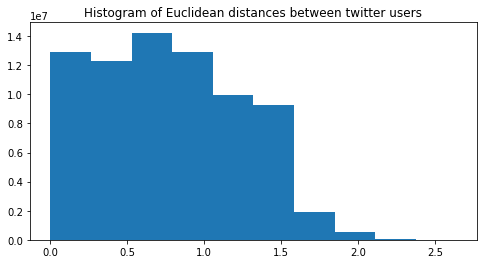

In [8]:
# Plot histogram
plt.figure(1, figsize=(8, 4))
plt.title("Histogram of Euclidean distances between twitter users")
plt.hist(distance.flatten());

In [14]:
# Prepare for graph construction
threshold = mean_distance/2
A_feature1 = np.heaviside(threshold-distance,0)
A_feature1 = A_feature1-np.eye(A_feature1.shape[0])

Number of nodes: 8605, Number of edges: 9281909
Number of self-loops: 0, Number of connected components: 55


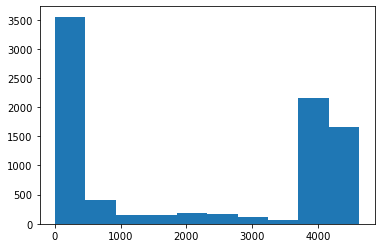

In [15]:
# Build graph and plot degree distribution
G_feature1 = nx.from_numpy_matrix(A_feature1)
print('Number of nodes: {}, Number of edges: {}'. format(G_feature1.number_of_nodes(), G_feature1.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(G_feature1.number_of_selfloops(), nx.number_connected_components(G_feature1)))
feature_degrees1 = [G_feature1.degree()[i] for i in G_feature1.nodes()]
plt.hist(feature_degrees1);

# Correlation Matrix between Columns

In [17]:
# Show correlation matrix between columns
pd_extract.corr()

,nof_tweets,nof_followers,nof_friends,retweet_tweet_ratio,nof_conf_hashtags,nof_overall_hashtags,nof_conf_mentions,follower_reciprocal_researcher,publications,organic_tweets,follower_global,followees_global,follower_researcher,follower_researcher_male_female_ratio,follower_researcher_phd_prof_ratio,follower_reciprocal_researcher_male_female_ratio,follower_reciprocal_researcher_phd_prof_ratio
nof_tweets,1.000000,0.038281,0.224460,-0.006931,0.196482,0.279201,0.260446,0.181647,-0.042883,0.632372,0.038281,0.224460,0.154188,0.053206,0.112998,0.048654,0.113282
nof_followers,0.038281,1.000000,0.064195,-0.008849,0.002366,0.015220,0.020135,0.007391,-0.006429,0.034649,1.000000,0.064195,0.512892,0.006093,0.010179,-0.006246,0.002802
nof_friends,0.224460,0.064195,1.000000,-0.019122,0.055158,0.086131,0.022334,0.055450,-0.014501,0.159091,0.064195,1.000000,0.015851,0.014398,0.002806,0.017352,0.014440
retweet_tweet_ratio,-0.006931,-0.008849,-0.019122,1.000000,0.069129,0.096789,0.243850,0.077423,-0.016255,-0.030784,-0.008849,-0.019122,0.015483,0.031250,0.062507,0.047558,0.073897
nof_conf_hashtags,0.196482,0.002366,0.055158,0.069129,1.000000,0.862859,0.445258,0.263593,-0.001058,0.339216,0.002366,0.055158,0.160683,0.058275,0.105620,0.058118,0.105483
nof_overall_hashtags,0.279201,0.015220,0.086131,0.096789,0.862859,1.000000,0.524304,0.245366,-0.026512,0.450118,0.015220,0.086131,0.145811,0.059482,0.114638,0.066452,0.115122
nof_conf_mentions,0.260446,0.020135,0.022334,0.243850,0.445258,0.524304,1.000000,0.424844,-0.013471,0.354442,0.020135,0.022334,0.284103,0.106109,0.171407,0.127900,0.197025
follower_reciprocal_researcher,0.181647,0.007391,0.055450,0.077423,0.263593,0.245366,0.424844,1.000000,0.125108,0.185612,0.007391,0.055450,0.555323,0.177918,0.268175,0.209336,0.346984
publications,-0.042883,-0.006429,-0.014501,-0.016255,-0.001058,-0.026512,-0.013471,0.125108,1.000000,-0.037045,-0.006429,-0.014501,0.136116,0.042479,0.114896,0.022712,0.118636
organic_tweets,0.632372,0.034649,0.159091,-0.030784,0.339216,0.450118,0.354442,0.185612,-0.037045,1.000000,0.034649,0.159091,0.155869,0.051239,0.125444,0.051508,0.111450


# Clustering -- Classification of female/male

Trying to predict male vs female and phd vs prof labels. 

In [90]:
# Take only those subjects where gender is specified
pd_gender=pd_extract_scaled[~(pd_content['gender']=='NA    ')]
pd_gender

,nof_tweets,nof_followers,nof_friends,retweet_tweet_ratio,nof_conf_hashtags,nof_overall_hashtags,nof_conf_mentions,follower_reciprocal_researcher,publications,organic_tweets,follower_global,followees_global,follower_researcher,follower_researcher_male_female_ratio,follower_researcher_phd_prof_ratio,follower_reciprocal_researcher_male_female_ratio,follower_reciprocal_researcher_phd_prof_ratio
1,0.032385,1.294897e-03,0.001731,0.0359,0.007624,0.011611,0.062500,0.151111,0.007519,0.082454,1.294897e-03,0.001731,0.031174,0.184211,0.461539,0.192308,0.555556
2,0.045324,1.326146e-04,0.000356,0.0350,0.066180,0.074732,0.125000,0.008889,0.019549,0.077661,1.326146e-04,0.000356,0.002435,0.800001,0.499998,0.999997,0.999991
4,0.040999,4.376212e-05,0.001963,0.1202,0.011841,0.024312,0.145833,0.226667,0.018045,0.170981,4.376212e-05,0.001963,0.028738,0.475001,0.533334,0.454546,0.600000
5,0.205374,9.761889e-04,0.000735,0.2570,0.015734,0.032266,0.104167,0.026667,0.003008,0.395973,9.761889e-04,0.000735,0.062835,0.247192,0.318182,0.200000,0.999991
7,0.083025,7.473815e-04,0.000982,0.1015,0.003406,0.008532,0.062500,0.004444,0.001504,0.237136,7.473815e-04,0.000982,0.006332,0.125000,0.999991,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8595,0.001421,1.328243e-05,0.002224,0.6599,0.003082,0.003015,0.062500,0.000000,0.001504,0.000000,1.328243e-05,0.002224,0.000487,0.000000,0.000000,0.000000,0.000000
8596,0.000298,4.012693e-05,0.004593,0.4138,0.000000,0.000385,0.000000,0.000000,0.001504,0.000000,4.012693e-05,0.004593,0.000000,0.000000,0.000000,0.000000,0.000000
8598,0.000000,0.000000e+00,0.000005,0.0000,0.000000,0.000000,0.000000,0.000000,0.172932,0.000000,0.000000e+00,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000
8603,0.000000,5.592603e-07,0.000080,0.0000,0.000000,0.000000,0.000000,0.008889,0.004511,0.000000,5.592603e-07,0.000080,0.000974,0.000000,0.000000,0.000000,0.000000


In [36]:
def epsilon_similarity_graph(X: np.ndarray, sigma=1, epsilon=0):
    """ X (n x d): coordinates of the n data points in R^d.
        sigma (float): width of the kernel
        epsilon (float): threshold
        Return:
        adjacency (n x n ndarray): adjacency matrix of the graph.
    """
    distance = np.array([[np.sum(np.power(X[i,:]-X[j,:],2)) for i in range(X.shape[0])] for j in range(X.shape[0])])
    distance = np.exp(-distance/(2*np.power(sigma,2)))
    adjacency = np.array([[distance[i,j] if distance[i,j]>epsilon else 0  for i in range(X.shape[0])] for j in range(X.shape[0])])
    adjacency = adjacency-np.eye(adjacency.shape[0])
    return adjacency

In [54]:
def compute_laplacian(adjacency: np.ndarray, normalize: bool):
    """ Return:
        L (n x n ndarray): combinatorial or symmetric normalized Laplacian.
    """
    d=np.sum(adjacency,axis=0)
    L=np.diag(d)-adjacency
    if normalize:
        L=np.array([[L[i,j]/np.sqrt(d[i]*d[j]+0.000000001) for i in range(L.shape[0])] for j in range(L.shape[0])])
    return L 

In [38]:
def spectral_decomposition(laplacian: np.ndarray):
    """ Return:
        lamb (np.array): eigenvalues of the Laplacian
        U (np.ndarray): corresponding eigenvectors.
    """
    [lamb, U] = np.linalg.eig(laplacian)
    ind=np.argsort(lamb)
    lamb=lamb[ind]
    U=U[:,ind]
    return lamb, U

In [39]:
def compute_number_connected_components(lamb: np.array, threshold: float):
    """ lamb: array of eigenvalues of a Laplacian
        Return:
        n_components (int): number of connected components.
    """
    n_components=np.sum(np.int8(lamb<threshold))
    return n_components

In [40]:
class SpectralClustering():
    def __init__(self, n_classes: int, normalize: bool):
        self.n_classes = n_classes
        self.normalize = normalize
        self.laplacian = None
        self.e = None
        self.U = None
        self.T = None
        self.clustering_method =  KMeans
        
    def fit_predict(self, adjacency):
        """ Your code should be correct both for the combinatorial
            and the symmetric normalized spectral clustering.
            Return:
            y_pred (np.ndarray): cluster assignments.
        """
        self.laplacian=compute_laplacian(adjacency,normalize=self.normalize)
        self.e, self.U = spectral_decomposition(self.laplacian)
        self.e = self.e[0:self.n_classes]
        self.U = self.U[:,0:self.n_classes]
        if self.normalize:
            self.T = np.transpose(np.array([[self.U[i,j]/np.sqrt(np.sum(self.U[i,:]*self.U[i,:])) for i in range(self.U.shape[0])] for j in range(self.U.shape[1])]))
            C = self.clustering_method(n_clusters=self.n_classes, random_state=0).fit(self.T)
        else:
            C = self.clustering_method(n_clusters=self.n_classes, random_state=0).fit(self.U)
            
        y_pred = C.labels_  
            
        return y_pred

In [91]:
X=np.array(pd_gender)

0.4484507826102927


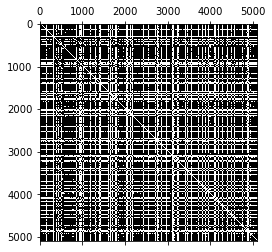

In [92]:
# Define sigma as the standard deviation of the weights
sigma=np.sqrt(np.var(np.array([[np.sqrt(np.sum(np.power(X[i,:]-X[j,:],2))) for i in range(X.shape[0])] for j in range(X.shape[0])])[:]))
print(sigma)
# Construct and show epsilon similarity graph
adjacency = epsilon_similarity_graph(X, sigma=sigma, epsilon=0.1)
plt.spy(adjacency)
plt.show()

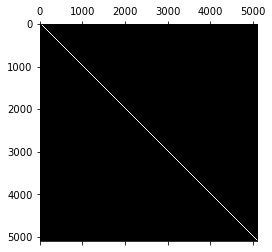

In [101]:
# Reduce the epsilon to have a single connected compenent
adjacency = epsilon_similarity_graph(X, sigma=sigma, epsilon=0)
plt.spy(adjacency)
plt.show()

In [102]:
laplacian_norm = compute_laplacian(adjacency, normalize=True)
lamb_norm, U_norm = spectral_decomposition(laplacian_norm)

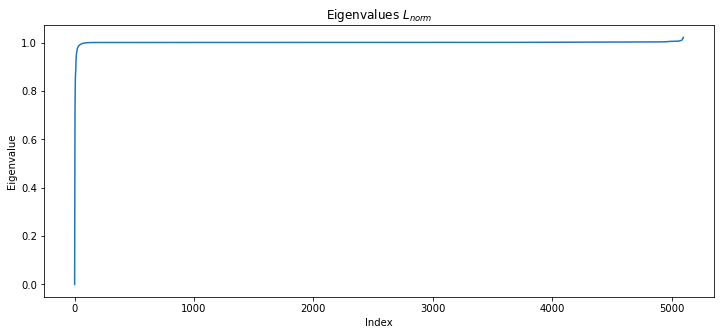

In [103]:
# Plot eigenvalues
plt.figure(figsize=(12,5))
plt.plot(lamb_norm)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues $L_{norm}$')
plt.show()

In [105]:
# Organize data and label
pd_gender_only=pd_content[~(pd_content['gender']=='NA    ')]
pd_gender_only=pd_gender_only['gender']
y_true=np.array(pd_gender_only=='female').astype('int8')
y_true

array([1, 0, 1, ..., 0, 0, 1], dtype=int8)

In [106]:
# Carry out spectral clustering
print("Connected components:", compute_number_connected_components(lamb_norm, threshold=1e-12))
spectral_clustering = SpectralClustering(n_classes=2, normalize=True)
y_pred = spectral_clustering.fit_predict(adjacency)

Connected components: 1


Text(0.5, 1.0, 'Ground Truth Distribution')

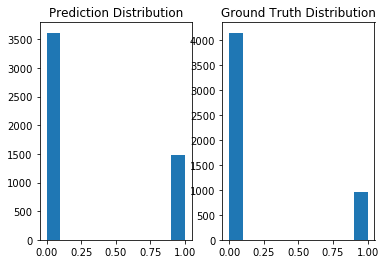

In [118]:
# Evaluate the results
if sum(y_pred)/len(y_pred)>0.5:
    y_pred=np.abs(1-y_pred) 

x=range(0,len(y_true))
plt.subplot(1,2,1)
plt.hist(y_pred)
plt.title('Prediction Distribution')
plt.subplot(1,2,2)
plt.hist(y_true)
plt.title('Ground Truth Distribution')

In [112]:
# Show the results
target_names = ['male', 'female']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.83      0.72      0.77      4147
     class 1       0.22      0.35      0.27       953

    accuracy                           0.65      5100
   macro avg       0.52      0.53      0.52      5100
weighted avg       0.71      0.65      0.68      5100



# Professor vs. PhD Classification (analogous to previous classification)

0.39925270253770107


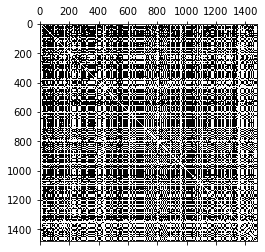

In [121]:
pd_role=pd_extract_scaled[~(pd_content['role']=='NA       ')]
X1=np.array(pd_role)
sigma1=np.sqrt(np.var(np.array([[np.sqrt(np.sum(np.power(X1[i,:]-X1[j,:],2))) for i in range(X1.shape[0])] for j in range(X1.shape[0])])[:]))
print(sigma1)
adjacency1 = epsilon_similarity_graph(X1, sigma=sigma1, epsilon=0.1)
plt.spy(adjacency1)
plt.show()

In [135]:
pd_role_only=pd_content[~(pd_content['role']=='NA       ')]
pd_role_only=pd_role_only['role']
y_true1=np.array(pd_role_only=='professor').astype('int8')
y_true1

array([0, 1, 1, ..., 1, 0, 0], dtype=int8)

In [124]:
laplacian_norm1 = compute_laplacian(adjacency1, normalize=True)
lamb_norm1, U_norm1 = spectral_decomposition(laplacian_norm1)

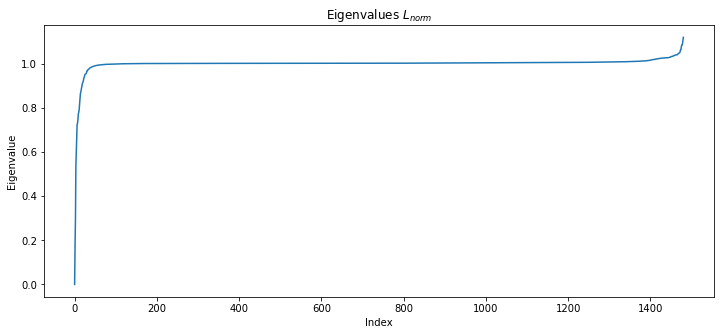

In [125]:
plt.figure(figsize=(12,5))
plt.plot(lamb_norm1)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues $L_{norm}$')
plt.show()

In [126]:
np.unique(np.array(pd_content['role']))

array(['NA       ', 'phd      ', 'professor'], dtype=object)

In [129]:
print(compute_number_connected_components(lamb_norm1, threshold=0.000001))

1


In [131]:
print("Connected components:", compute_number_connected_components(lamb_norm1, threshold=1e-12))
spectral_clustering = SpectralClustering(n_classes=2, normalize=True)
y_pred1 = spectral_clustering.fit_predict(adjacency1)

Connected components: 1


Text(0.5, 1.0, 'Ground Truth Distribution')

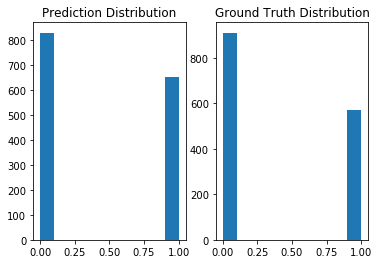

In [142]:
if sum(y_pred1)/len(y_pred1)>0.5:
    y_pred1=np.abs(1-y_pred1)   

plt.subplot(1,2,1)
plt.hist(y_pred1)
plt.title('Prediction Distribution')
plt.subplot(1,2,2)
plt.hist(y_true1)
plt.title('Ground Truth Distribution')

In [143]:
target_names = ['phd', 'prof']
print(classification_report(y_true1, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

         phd       0.75      0.68      0.72       911
        prof       0.56      0.64      0.60       570

    accuracy                           0.67      1481
   macro avg       0.65      0.66      0.66      1481
weighted avg       0.68      0.67      0.67      1481

